In [14]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import napari
from tqdm import tqdm as tqdm
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [140]:
# Load image
raw_image = io.imread('../data/wt_embryos/20211104_series6.tif')

In [141]:
# Separate channel
yfp_channel = raw_image[:,:,:,:,1]
cfp_channel = raw_image[:,:,:,:,2]
fret_channel = raw_image[:,:,:,:,3]

In [142]:
raw_image.shape # (t, z, x, y, c)

(15, 26, 512, 512, 4)

In [196]:
# Separate channel
yfp_channel = io.imread('../data/wt_embryos/20211104_series6/20211104_series6_c1.tif')
cfp_channel = io.imread('../data/wt_embryos/20211104_series6/20211104_series6_c2_bcorr.tif')
fret_channel = io.imread('../data/wt_embryos/20211104_series6/20211104_series6_c3.tif')

In [197]:
yfp_statistics = {'mean': [], 'st_dev': []}
cfp_statistics = {'mean': [], 'st_dev': []} # Initialize cfp data
fret_statistics = {'mean': [], 'st_dev': []} # Initialize fret data

In [198]:
cfp_channel.shape

(15, 15, 512, 512)

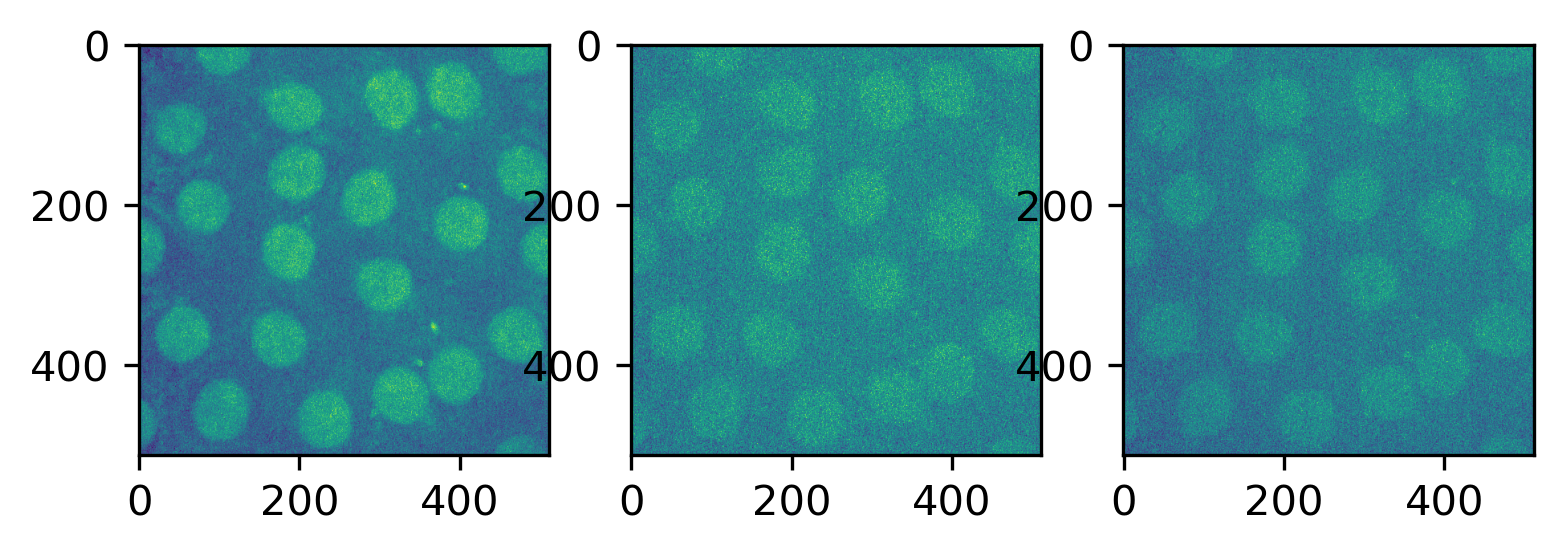

In [199]:
# Check if separation of channels went well
fig, ax = plt.subplots(1, 3)
ax[0].imshow(yfp_channel[0,0,:,:])
ax[1].imshow(cfp_channel[0,0,:,:])
ax[2].imshow(fret_channel[0,0,:,:])

# Intensity analysis of total slice

In [200]:
for i in tqdm(range(0, len(cfp_channel))):
    yfp_ints = yfp_channel[i].flatten()
    yfp_statistics['mean'].append(np.mean(yfp_ints))
    yfp_statistics['st_dev'].append(np.std(yfp_ints))
    
    cfp_ints = cfp_channel[i].flatten()
    cfp_statistics['mean'].append(np.mean(cfp_ints))
    cfp_statistics['st_dev'].append(np.std(cfp_ints))
    
    fret_ints = fret_channel[i].flatten()
    fret_statistics['mean'].append(np.mean(fret_ints))
    fret_statistics['st_dev'].append(np.std(fret_ints))

100%|████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 22.09it/s]


In [201]:
yfp_pd = pd.DataFrame(yfp_statistics)
cfp_pd = pd.DataFrame(cfp_statistics)
fret_pd = pd.DataFrame(fret_statistics)

In [202]:
fret_eff = []
for i in range(0, len(cfp_pd)):
    fret_eff.append(fret_pd['mean'][i]/cfp_pd['mean'][i])

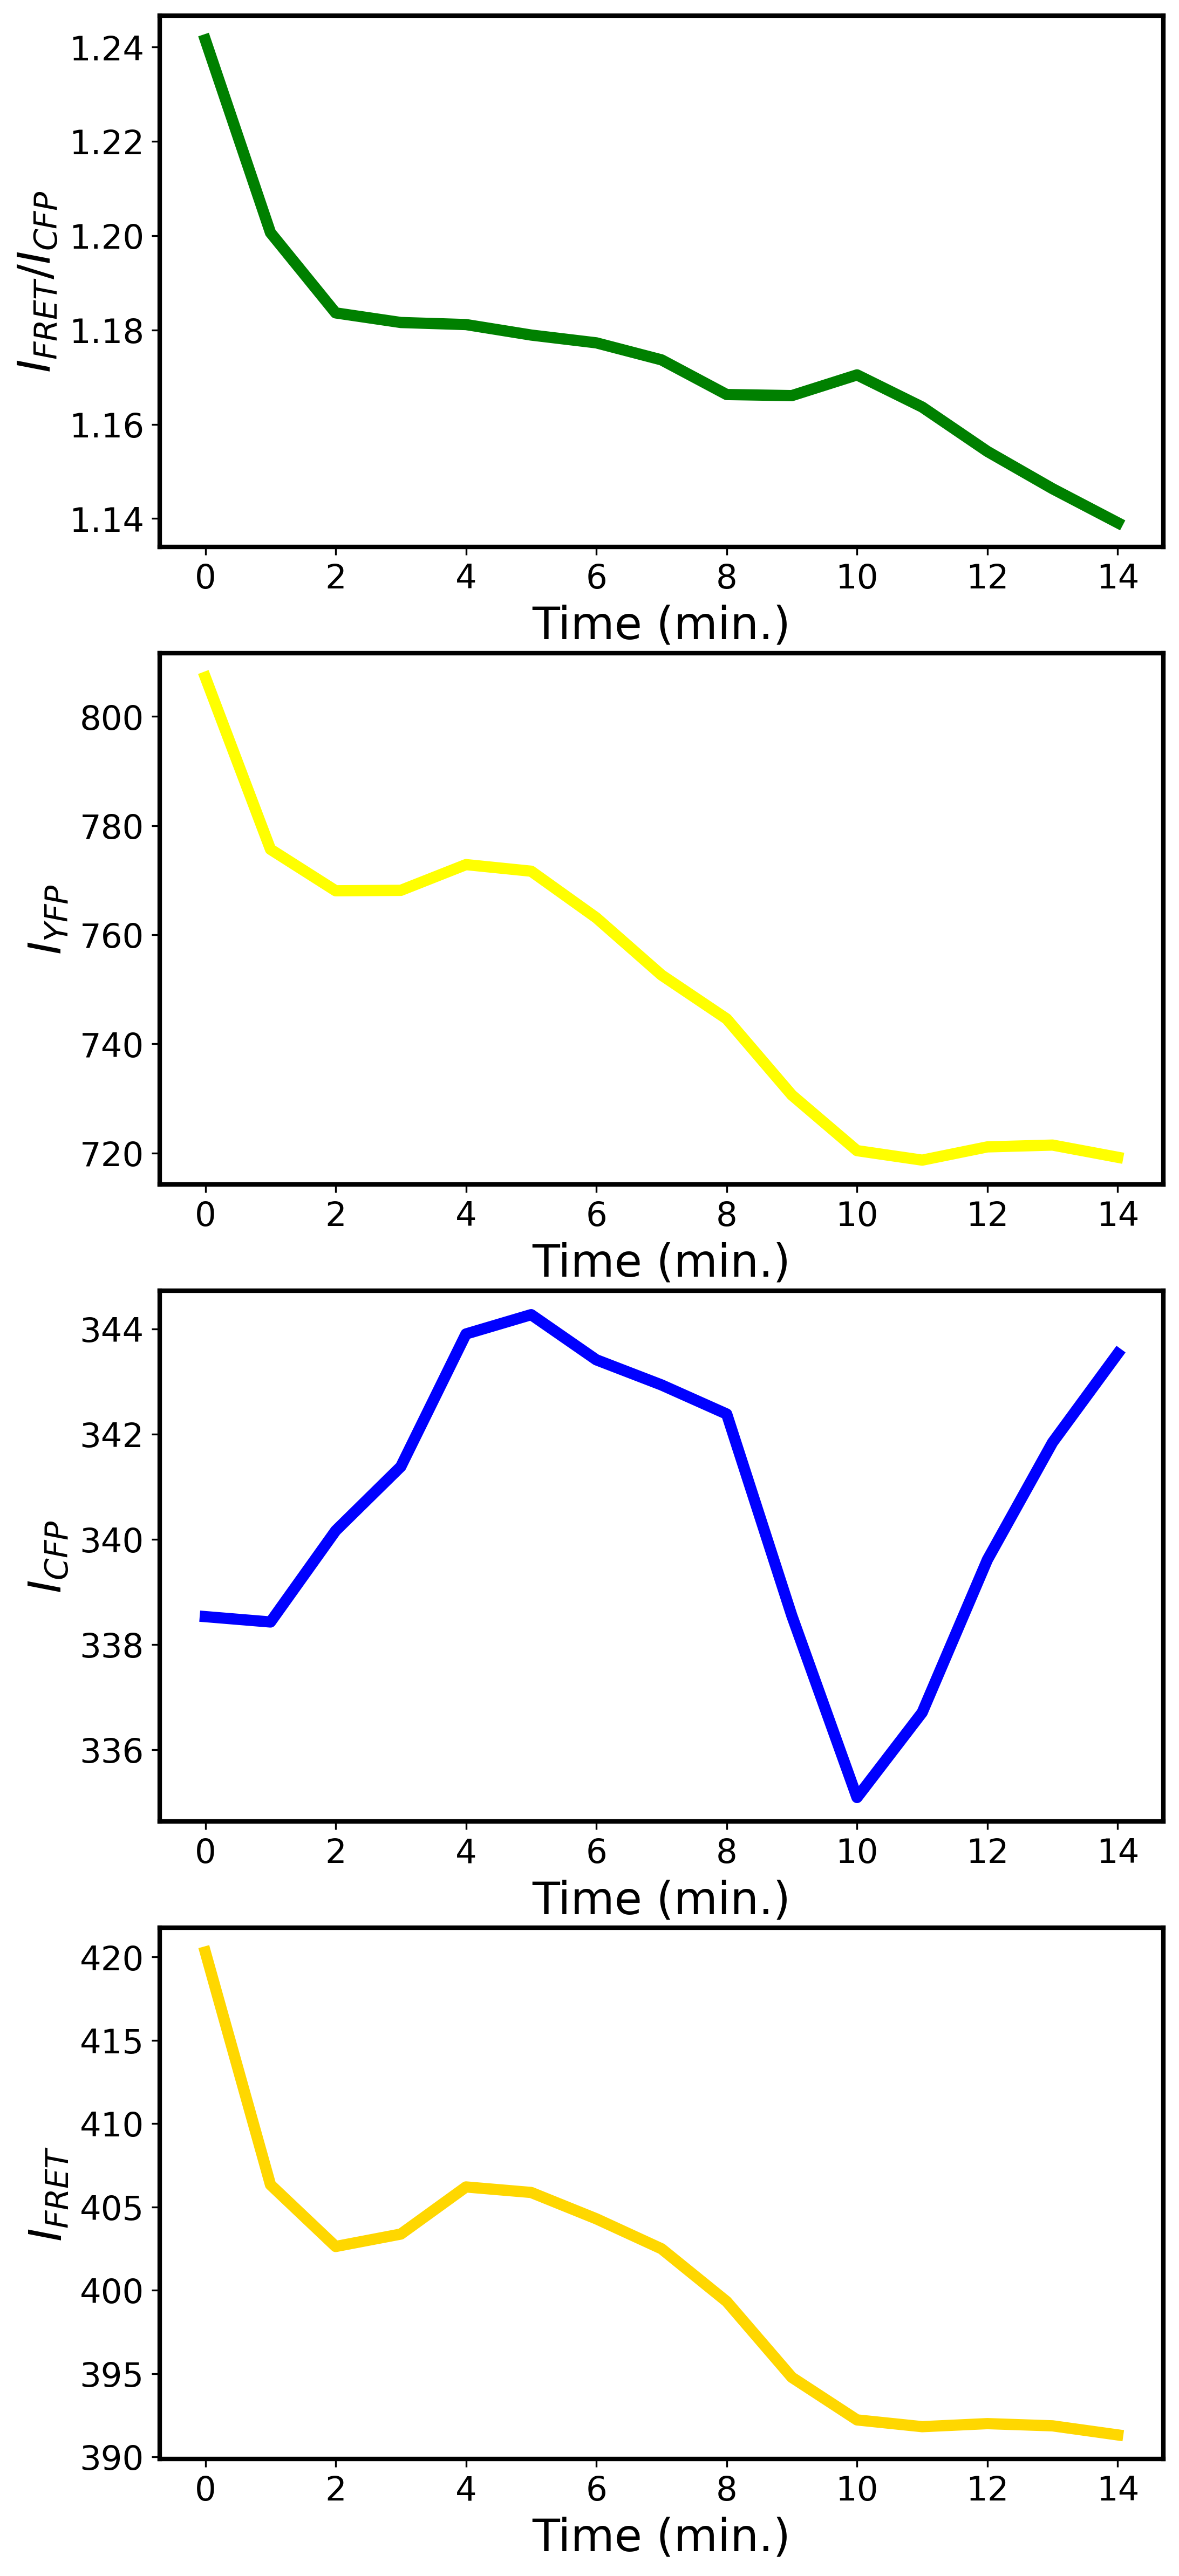

In [203]:
fig, ax = plt.subplots(4, 1, figsize=(8,20))

ax[0].plot(fret_eff, linewidth = 5, color = 'green')
ax[0].set_ylabel('$I_{FRET}$/$I_{CFP}$', size = 20)
ax[0].set_xlabel('Time (min.)', size = 20)
for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(2)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].tick_params(axis='both', which='minor', labelsize=15)

ax[1].plot(yfp_pd['mean'], linewidth = 5, color = 'yellow')
ax[1].set_ylabel('$I_{YFP}$', size = 20)
ax[1].set_xlabel('Time (min.)', size = 20)
for axis in ['top','bottom','left','right']:
    ax[1].spines[axis].set_linewidth(2)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='minor', labelsize=15)

ax[2].plot(cfp_pd['mean'], linewidth = 5, color = 'blue')
ax[2].set_ylabel('$I_{CFP}$', size = 20)
ax[2].set_xlabel('Time (min.)', size = 20)
for axis in ['top','bottom','left','right']:
    ax[2].spines[axis].set_linewidth(2)
ax[2].tick_params(axis='both', which='major', labelsize=15)
ax[2].tick_params(axis='both', which='minor', labelsize=15)

ax[3].plot(fret_pd['mean'], linewidth = 5, color = 'gold')
ax[3].set_ylabel('$I_{FRET}$', size = 20)
ax[3].set_xlabel('Time (min.)', size = 20)
for axis in ['top','bottom','left','right']:
    ax[3].spines[axis].set_linewidth(2)
ax[3].tick_params(axis='both', which='major', labelsize=15)
ax[3].tick_params(axis='both', which='minor', labelsize=15)

#fig.suptitle('Average CDK1 Activity Across 13 $\mu$m Slice', size = 25)
#fig.savefig('../outputs/20220117_series5/full_frame_bleach_corr_bgsub.png')

Let's just turn this into a function.

# Function

In [204]:
def plot_fret_activity(filename): # Make sure that data is in (t, z, x, y, c)
    raw_image = io.imread(filename)
    
    yfp_channel = raw_image[:,:,:,:,1]
    cfp_channel = raw_image[:,:,:,:,2]
    fret_channel = raw_image[:,:,:,:,3]
    
    yfp_statistics = {'mean': [], 'st_dev': []}
    cfp_statistics = {'mean': [], 'st_dev': []} # Initialize cfp data
    fret_statistics = {'mean': [], 'st_dev': []} # Initialize fret data
    
    yfp_pd = pd.DataFrame(yfp_statistics)
    cfp_pd = pd.DataFrame(cfp_statistics)
    fret_pd = pd.DataFrame(fret_statistics)
    
    fret_eff = []
    for i in range(0, len(cfp_pd)):
        fret_eff.append(fret_pd['mean'][i]/cfp_pd['mean'][i])
    
    fig, ax = plt.subplots(4, 1, figsize=(8,20))

    ax[0].plot(fret_eff, linewidth = 5, color = 'green')
    ax[0].set_ylabel('$I_{FRET}$/$I_{CFP}$', size = 20)
    ax[0].set_xlabel('Time (min.)', size = 20)
    for axis in ['top','bottom','left','right']:
        ax[0].spines[axis].set_linewidth(2)
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[0].tick_params(axis='both', which='minor', labelsize=15)

    ax[1].plot(yfp_pd['mean'], linewidth = 5, color = 'yellow')
    ax[1].set_ylabel('$I_{YFP}$', size = 20)
    ax[1].set_xlabel('Time (min.)', size = 20)
    for axis in ['top','bottom','left','right']:
        ax[1].spines[axis].set_linewidth(2)
    ax[1].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='minor', labelsize=15)

    ax[2].plot(cfp_pd['mean'], linewidth = 5, color = 'blue')
    ax[2].set_ylabel('$I_{CFP}$', size = 20)
    ax[2].set_xlabel('Time (min.)', size = 20)
    for axis in ['top','bottom','left','right']:
        ax[2].spines[axis].set_linewidth(2)
    ax[2].tick_params(axis='both', which='major', labelsize=15)
    ax[2].tick_params(axis='both', which='minor', labelsize=15)

    ax[3].plot(fret_pd['mean'], linewidth = 5, color = 'gold')
    ax[3].set_ylabel('$I_{FRET}$', size = 20)
    ax[3].set_xlabel('Time (min.)', size = 20)
    for axis in ['top','bottom','left','right']:
        ax[3].spines[axis].set_linewidth(2)
    ax[3].tick_params(axis='both', which='major', labelsize=15)
    ax[3].tick_params(axis='both', which='minor', labelsize=15)

    fig.suptitle('Average CDK1 Activity Across 13 $\mu$m Slice', size = 25)
    #fig.savefig('../output/series_3_c234_t11to40_zall_output.png')

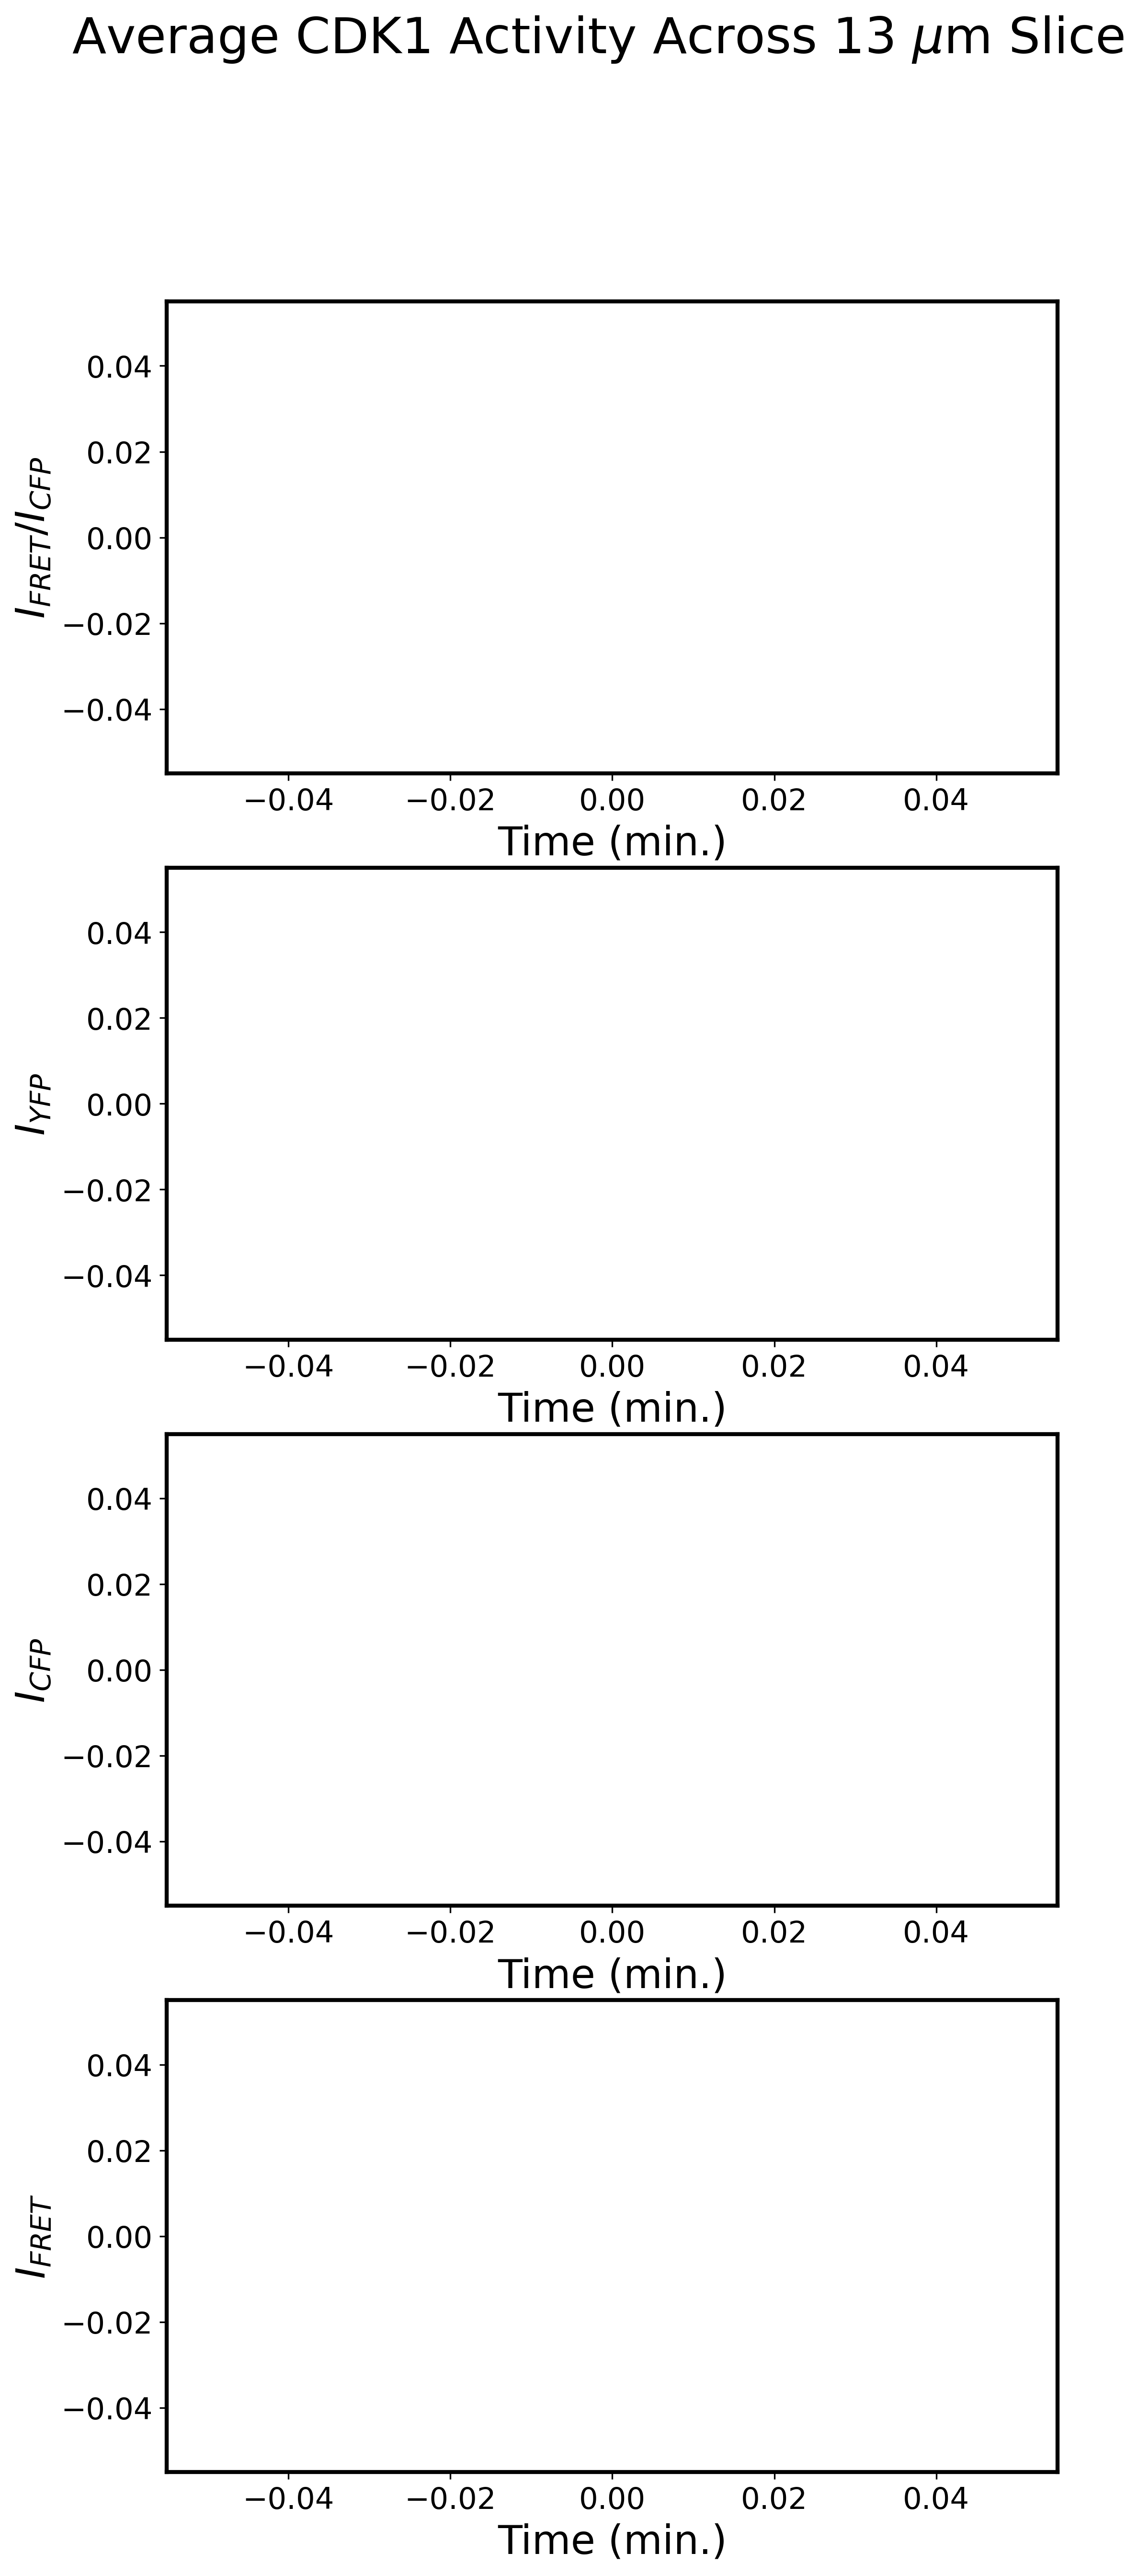

In [52]:
plot_fret_activity('../data/20220117_series5/Cdk1-FRET_Sqh-mCherry_CycB(m)_Zeiss_20220117.mvd2 - Series 5.tif')